# Palmer Penguin Dataset Analysis

In this dataset, we will **classify** penguin's types (Chinstrap, Adélie, and Gentoo) based on the culmen depth and length, flipper length, and body mass. If you do not like the featured iris dataset, this one is for you.

There is also a smaller dataset, but I will use this one from Kaggle to improve my data handling skills.

<p align="center">
<img src="penguin.png" width="480">
</p>

You can have a view at this site: [link](https://allisonhorst.github.io/palmerpenguins/reference/penguins_raw.html)

Source code I downloaded from: [Kaggle](https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data?select=penguins_size.csv)

___

|Rating           |Best beginner dataset for null treating|
|-----------------|-|
|Difficulty       | <font size=5>  &#9733; &#9733; &#9734; &#9734; &#9734; </font> |
|Dataset size     | <font size=5>  &#9733; &#9734; &#9734; &#9734; &#9734; </font> |
|Interesting topic| <font size=5>  &#9733; &#9733; &#9733; &#9733; &#9733; </font> |
|Popularity       | <font size=5>  &#9733; &#9733; &#9733; &#9733; &#9733; </font> |

___

In [1]:
# Framework for data cleaning and data visualising
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Framework for machine learning
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("penguins_lter.csv")
df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


___

## 1) A data's problem

*How do penguins make burgers?*

***With their flippers!***

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

___

This dataset contains null. However, we will observe each feature first.

0) `studyName` contains the ID of the study. Why would everyone ask the penguin who researched them?
1) `Sample Number` is the ID of the penguin of each study. It is indeed useless.
2) `Region` only has one unique kind of value: 'Anvers'. Maybe the researchers were Belgian, or the penguins have migrated to this country.
3) `Stage` contains one value: 'Adult, 1 Egg Stage'. No penguin is viviparous.
4) `Individual ID` are a series of ID. Maybe the researchers wanted to name the easy-to-remember to them.
5) `Date Egg` is dubious. Perhaps it is the first date the eggs was layed, as the values are mostly November. So, there is no reason to predict the penguin type by date.
6) `Comments` contains the reason of missing datas.

___

In [4]:
# Drop unnecessary columns
df.drop(columns=["studyName", "Sample Number", "Region", "Stage", "Individual ID", "Date Egg", "Comments"], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Island               344 non-null    object 
 2   Clutch Completion    344 non-null    object 
 3   Culmen Length (mm)   342 non-null    float64
 4   Culmen Depth (mm)    342 non-null    float64
 5   Flipper Length (mm)  342 non-null    float64
 6   Body Mass (g)        342 non-null    float64
 7   Sex                  334 non-null    object 
 8   Delta 15 N (o/oo)    330 non-null    float64
 9   Delta 13 C (o/oo)    331 non-null    float64
dtypes: float64(6), object(4)
memory usage: 27.0+ KB


___

1) `Culmen Length` is the length of a penguin's beak.
2)  `Culmen Depth` is similar to above.
3)  `Flipper Length` is the length of the wings.
4)  `Body Mass` is obviously a mass of the penguin.
5)  `Sex` contains `MALE` and `FEMALE`.
6) `Delta 15 N` is the ratio of Nitrogen-15 / Nitrogen-14 in the penguin's blood.
7)  `Delta 13 C` is the ratio of Carbon-13 / Carbon-12 in the penguin's blood.
___

There are two null rows in "Culmen Length (mm)", "Culmen Depth (mm)" and "Flipper Length (mm)". We can safely drop these.

In [5]:
# Null treatment
df[df["Culmen Length (mm)"].isna()]

,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
3,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339,Gentoo penguin (Pygoscelis papua),Biscoe,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df = df[df["Culmen Length (mm)"].notna()]

We should also drop null rows in the `Sex` feature, as there is no way to fill null with this kind of value.

In [7]:
df = df[df["Sex"].notna()]

# This value contains a dot for no reason. Let's drop it as well!
df = df[df["Sex"] != "."]

We can drop null in the `Delta 13 C` and `Delta 15 N`.

In [8]:
df = df[df["Delta 15 N (o/oo)"].notna()]

___

0) `Species` contains three species of the penguins: Chinstrap, Adélie, and Gentoo. However, the actual name in the dataset is pretty long, so we will change it.
1) `Island` contains three names: Torgersen, Biscoe, and Dream. All of them are the islands, where the researchers can do their work.
2) `Clutch Completion` is a process of a group of eggs during a breeding season. `Yes` if at least one chick hatched.
3) `Sex` Contains `Male` and `Female`, as expected.

You can have a view with this site: [link](https://allisonhorst.github.io/palmerpenguins/reference/penguins_raw.html)

___

In [9]:
def shorten_species(x):
    match x:
        case "Adelie Penguin (Pygoscelis adeliae)": return "Adelie"
        case "Chinstrap penguin (Pygoscelis antarctica)": return "Chinstrap"
        case "Gentoo penguin (Pygoscelis papua)": return "Gentoo"

# 0
df["Species"] = df["Species"].apply(shorten_species)

# 2
df["Clutch Completion"] = df["Clutch Completion"].map({ "Yes": True, "No": False })

# 3
df["SexMale"] = df["Sex"].apply(lambda x: True if x == "Male" else False)
df.drop(columns=["Sex"], inplace=True)

Change the column names to make it easier to programme

In [10]:
df.rename(columns={
    "Clutch Completion": "Clutch_Completion",
    "Date Egg": "Date_Egg",
    "Culmen Length (mm)": "Culmen_Length",
    "Culmen Depth (mm)": "Culmen_Depth",
    "Flipper Length (mm)": "Flipper_Length",
    "Body Mass (g)": "Body_Mass",
    "Delta 15 N (o/oo)": "Delta_15N",
    "Delta 13 C (o/oo)": "Delta_13C"
}, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 324 entries, 1 to 343
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Species            324 non-null    object 
 1   Island             324 non-null    object 
 2   Clutch_Completion  324 non-null    bool   
 3   Culmen_Length      324 non-null    float64
 4   Culmen_Depth       324 non-null    float64
 5   Flipper_Length     324 non-null    float64
 6   Body_Mass          324 non-null    float64
 7   Delta_15N          324 non-null    float64
 8   Delta_13C          324 non-null    float64
 9   SexMale            324 non-null    bool   
dtypes: bool(2), float64(6), object(2)
memory usage: 23.4+ KB


___

## 2) Analysis

*What do penguins eat for lunch?*

***Ice-burgers!***

___

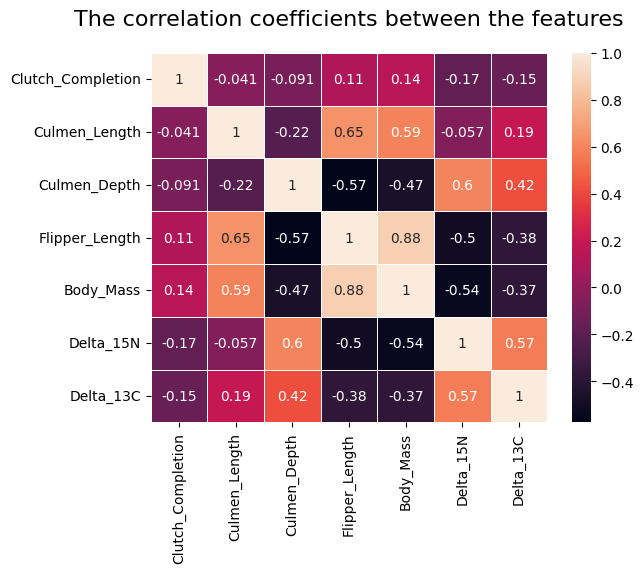

In [11]:
sns.heatmap(
    df[['Clutch_Completion', 'Culmen_Length',
       'Culmen_Depth', 'Flipper_Length', 'Body_Mass', 'Delta_15N', 'Delta_13C']].corr(),
       annot=True, linewidth=0.5)

plt.title("The correlation coefficients between the features", fontdict={ "fontsize": 16 }, pad=20)
plt.show()

___

As we can see, there are some linear relationship between some features:
- A penguin with a long and narrow culmen (like a duck) is probably bigger, heavier and has a longer flipper.
- Also, this penguin will have lower Nitrogen-15 and Carbon-13 ratios.

...

But about the label `Species`?
___

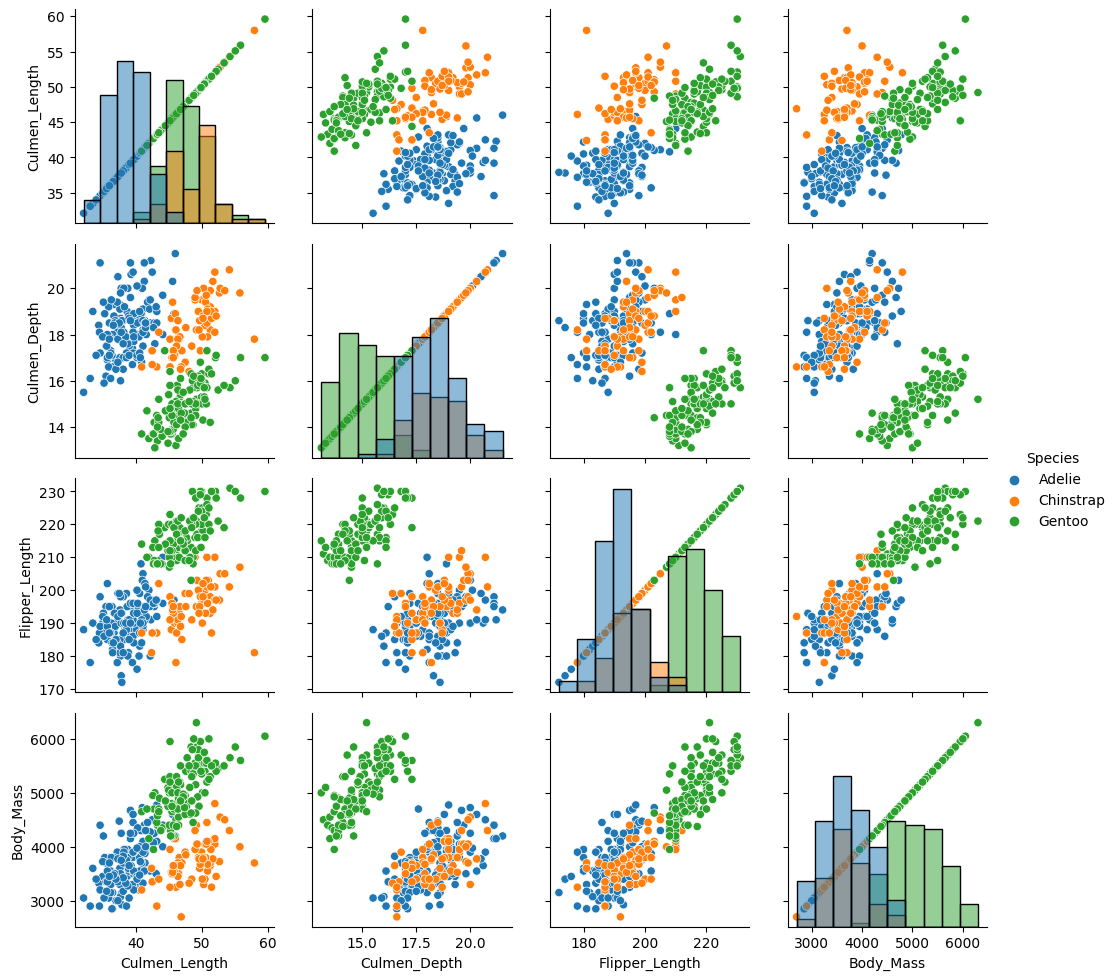

In [12]:
g = sns.PairGrid(df[["Species", "Culmen_Length", "Culmen_Depth", "Flipper_Length", "Body_Mass"]], hue="Species")
g.map_diag(sns.histplot)
g.map(sns.scatterplot)
g.add_legend()

plt.show()

___

There are three distinct penguin groups. it seems:
- Gentoo penguins are bigger and fatter. According to the correlation table above, we can confirm this.
- Adelie penguins are smaller.
___

___

## Modeling

*What do penguins like to wear on the beach?*

***A beak-ini.***

___

In [13]:
label_vals = df["Species"].unique()

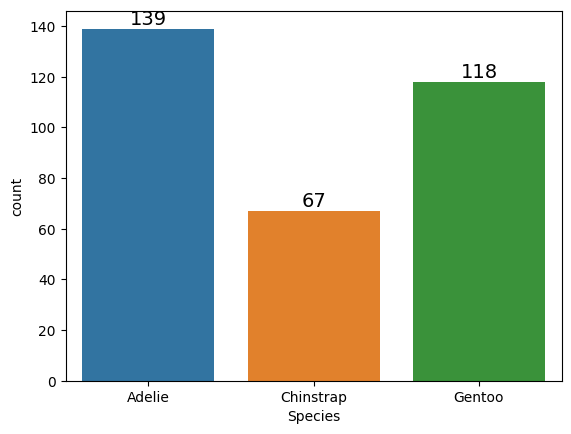

In [14]:
ax = sns.countplot(df, x="Species")
ax.bar_label(ax.containers[0], size=14)
plt.show()

___

As we can see, the data is imbalance. The highest count is 'Adelie' with 139 penguins, and the smallest one is 'Chinstrap' with 67 penguins.

We will talk about this when we train the models.

___

___

### Logistic Regression

The logistic regression model requires labels that contains only 0 or 1. In this case, the labels contains 3 species: Adélie, Chinstrap, and Gentoo.
Some model requires the label to be converted into one-hot encoding labels. However, in ScikitLearn, it does not have to.

___

In [15]:
X = df.drop(columns=["Species"])
y = df["Species"]

# One-hot encoding
X = pd.get_dummies(X)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((259, 11), (65, 11), (259,), (65,))

In [16]:
X_train.head()

,Clutch_Completion,Culmen_Length,Culmen_Depth,Flipper_Length,Body_Mass,Delta_15N,Delta_13C,SexMale,Island_Biscoe,Island_Dream,Island_Torgersen
108,True,38.1,17.0,181.0,3175.0,9.79532,-25.27385,False,True,False,False
193,True,46.2,17.5,187.0,3650.0,9.61734,-24.66188,False,False,True,False
287,True,49.5,16.2,229.0,5800.0,8.49854,-26.74809,False,True,False,False
142,True,32.1,15.5,188.0,3050.0,8.79787,-26.61075,False,False,True,False
161,True,51.3,19.9,198.0,3700.0,8.79581,-24.36088,False,False,True,False


Balance the model

In [17]:
sm = SMOTE()
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

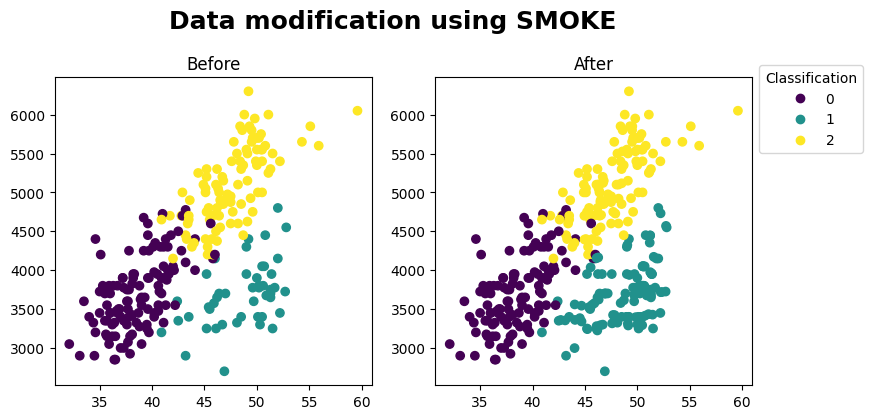

In [18]:
# Draw the data
fig, ax = plt.subplots(1, 2, figsize=(9, 4))

def apply_colours(y):
    match y:
        case "Adelie":      return 0
        case "Chinstrap":   return 1
        case "Gentoo":      return 2
        case _: return 3

scatter = ax[0].scatter(
    X_train["Culmen_Length"],
    X_train["Body_Mass"],
    c=y_train.apply(apply_colours))
ax[0].set_title("Before")

ax[1].scatter(
    X_train_res["Culmen_Length"],
    X_train_res["Body_Mass"],
    c=y_train_res.apply(apply_colours))
ax[1].set_title("After")

fig.legend(*scatter.legend_elements(), loc="center left", bbox_to_anchor=(0.9, 0.8), title="Classification")
fig.suptitle("Data modification using SMOKE", fontsize=18, fontweight="bold", y=1.05)

plt.show()

In [19]:
enc = LabelEncoder()
enc.fit(label_vals)
y = enc.transform(y)
y_test = enc.transform(y_test)
y_train_res = enc.transform(y_train_res)

In [20]:
lr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
lr_model.fit(X_train_res, y_train_res)
y_pred = lr_model.predict(X_test)

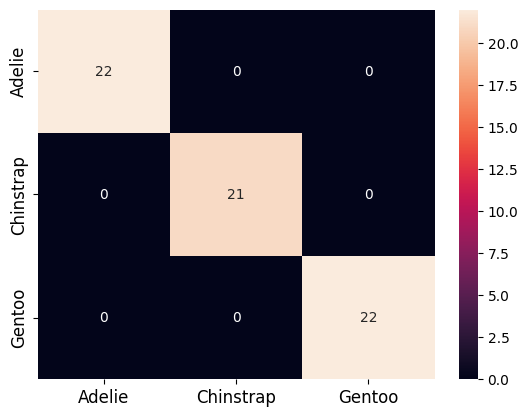

In [21]:
fig, ax = plt.subplots()

pos = np.arange(len(label_vals))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax)
ax.set_xticks(pos + 0.5, label_vals, fontsize=12)
ax.set_yticks(pos + 0.5, label_vals, fontsize=12)

plt.show()

___

**Unexpected!**

The model seems to predict correctly, as each kind of penguin has their distinct type.
However, we will use Cross-validation to check if it is overfitted.

___

In [22]:
scores = cross_val_score(lr_model, X, y, cv=5)
scores

array([1., 1., 1., 1., 1.])